In [1]:
import math
def vert_coord(radius):
    
    print('radius = ', radius)
    
    scaler = radius/(3/8)**0.5/2
    v0 = [1, 0, -1/2**0.5]
    v1 = [-1, 0, -1/2**0.5]
    v2 = [0, 1, 1/2**0.5]
    v3 = [0, -1, 1/2**0.5]
    VertCoord = [v0, v1, v2, v3]
    VertCoord_ = []
    for i in VertCoord:
        temp_list = []
        for j in i:
            temp = j*scaler
            temp_list.append(temp)
        VertCoord_.append(temp_list)
    return VertCoord_

if __name__ == '__main__':
    print(vert_coord(radius = 30))

radius =  30
[[24.494897427831784, 0.0, -17.320508075688775], [-24.494897427831784, 0.0, -17.320508075688775], [0.0, 24.494897427831784, 17.320508075688775], [0.0, -24.494897427831784, 17.320508075688775]]


radius =  30


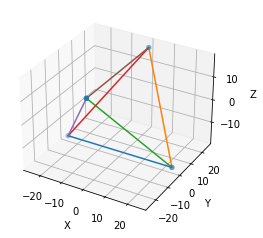

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot(radius):
    coord = vert_coord(radius)
    X = []
    Y = []
    Z = []
    for i in coord:
        X.append(i[0])
        Y.append(i[1])
        Z.append(i[2])
    fig = plt.figure()
    ax = plt.subplot(projection='3d')
    ax.scatter(X, Y, Z)
    
    draw_line(coord, ax, 0, 1)
    draw_line(coord, ax, 0, 2)
    draw_line(coord, ax, 0, 3)
    draw_line(coord, ax, 1, 2)
    draw_line(coord, ax, 1, 3)
    draw_line(coord, ax, 2, 3)
    
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def draw_line(list, ax, a, b):
        figure = ax.plot([list[a][0], list[b][0]], [list[a][1], list[b][1]], [list[a][2], list[b][2]])    
    
if __name__ == '__main__':
    plot(radius = 30)

In [3]:
def distance(a, b):
    n = 15
    return round(((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2] - b[2])**2)**0.5, n)

if __name__ == '__main__':
    coord = vert_coord(radius = 30)
    print(distance([0, 0, 0], coord[1]))
    print(distance(coord[0], coord[1]))

radius =  30
30.000000000000004
48.98979485566357


In [4]:
def edge_len_valid(radius):
    coord = vert_coord(radius)
    EdgeLen = []
    EdgeLen.append(distance(coord[0], coord[1]))
    EdgeLen.append(distance(coord[0], coord[2]))
    EdgeLen.append(distance(coord[0], coord[3]))
    EdgeLen.append(distance(coord[1], coord[2]))
    EdgeLen.append(distance(coord[1], coord[3]))
    EdgeLen.append(distance(coord[2], coord[3]))
    
    n = 12
    
    print('All elements in list:')
    print('Length: ', EdgeLen[0])
    print('Count: ', len(EdgeLen))
    print('E = 6 for tetrahedron')
    
    # check if all lengths are identical
    status = 1
    for i in range(0, len(EdgeLen)):
        for j in range(i, len(EdgeLen)):
            if round(EdgeLen[i], n) != round(EdgeLen[j], n):
                status = 0
                break
    if status == 1:
        print('Lengths match!')
        return EdgeLen[0]
    else:
        print('Lengths do not match!')
        return 0
    
if __name__ == '__main__':
    edge_len_valid(radius = 30)

radius =  30
All elements in list:
Length:  48.98979485566357
Count:  6
E = 6 for tetrahedron
Lengths match!


In [5]:
def mid_pt(a, b):
    # this is a seperate function for calculating mid point of two coords
    n = 15
    return [round((a[0]+b[0])/2, n), round((a[1]+b[1])/2, n), round((a[2]+b[2])/2, n)]

if __name__ == '__main__':
    print(mid_pt([1, 2, 3], [4, 5, 6]))

[2.5, 3.5, 4.5]


In [6]:
import math

def COM_coord(a, b, c):
    n = 10
    mid_a = mid_pt(b, c)
    mid_b = mid_pt(a, c)
    mid_c = mid_pt(a, b)
    COM_a = []
    COM_b = []
    COM_c = []
    for i in range(0, 3):
        COM_a.append(round(a[i] + (mid_a[i] - a[i])/(1+math.sin(30/180*math.pi)), 12))
        COM_b.append(round(b[i] + (mid_b[i] - b[i])/(1+math.sin(30/180*math.pi)), 12))
        COM_c.append(round(c[i] + (mid_c[i] - c[i])/(1+math.sin(30/180*math.pi)), 12))
    
    if COM_a == COM_b and COM_b == COM_c:
        return COM_a
    else: 
        print('COM coordinates do not match!')
        print(COM_a)
        print(COM_b)
        print(COM_c)
        return COM_a
if __name__ == '__main__':
    coord = vert_coord(radius = 30)
    print(COM_coord(coord[0], coord[1], coord[2]))

radius =  30
[0.0, 8.164965809277, -5.773502691896]


In [7]:
def COM_list_gen(radius):
    coord = vert_coord(radius)
    COM_list = []
    COM_list.append(COM_coord(coord[0], coord[1], coord[2]))
    COM_list.append(COM_coord(coord[0], coord[2], coord[3]))
    COM_list.append(COM_coord(coord[0], coord[1], coord[3]))
    COM_list.append(COM_coord(coord[1], coord[2], coord[3]))
    return COM_list

if __name__ == '__main__':
    result = COM_list_gen(radius = 30)
    print(result)

radius =  30
[[0.0, 8.164965809277, -5.773502691896], [8.164965809277, 0.0, 5.773502691896], [0.0, -8.164965809277, -5.773502691896], [-8.164965809277, 0.0, 5.773502691896]]


In [8]:
def COM_leg_coord(a, b, c):
    COM_leg = []
    COM_leg.append(COM_coord(a, b, c))
    COM_leg.append(mid_pt(a, b))
    COM_leg.append(mid_pt(b, c))
    COM_leg.append(mid_pt(c, a))
    return COM_leg

if __name__ == '__main__':
    print(COM_leg_coord(coord[0], coord[1], coord[2]))

[[0.0, 8.164965809277, -5.773502691896], [0.0, 0.0, -17.320508075688775], [-12.247448713915892, 12.247448713915892, 0.0], [12.247448713915892, 12.247448713915892, 0.0]]


In [9]:
def COM_leg_list_gen(radius):
    coord = vert_coord(radius)
    COM_leg_list = []   
    COM_leg_list.append(COM_leg_coord(coord[0], coord[1], coord[2]))
    COM_leg_list.append(COM_leg_coord(coord[0], coord[2], coord[3]))
    COM_leg_list.append(COM_leg_coord(coord[0], coord[1], coord[3]))
    COM_leg_list.append(COM_leg_coord(coord[1], coord[2], coord[3]))
    
    return COM_leg_list

def COM_leg_list_valid(radius):
    result = COM_leg_list_gen(radius)
    count = 0
    pool = []
    for i in result:
        for j in range(1, 4):
            if i[j] not in pool:
                pool.append(i[j])
                count += 1
    print('Number of faces: ', len(COM_leg_list_gen(radius)))
    print('Total number of non-repetitive interfaces: ', count, '(should be 6)')

if __name__ == '__main__':
    COM_leg_list_valid(radius = 30)

radius =  30
radius =  30
Number of faces:  4
Total number of non-repetitive interfaces:  6 (should be 6)


In [10]:
def leg_reduce(COM, leg, sigma):
    # calculate the recuced length when considering the sigma value
    n = 12
    angle = math.acos(1/3)
    red_len = sigma/(2*math.sin(angle/2))
    ratio = 1 - red_len/distance(COM, leg)
    leg_red = []
    for i in range(0, 3):
        leg_red.append(round((leg[i] - COM[i])*ratio + COM[i], n))
    return leg_red

def leg_reduce_valid(a, b, c, d, sigma):
    # validate the reduced length of legs is correct
    n = 10
    result_1 = leg_reduce(a, b, sigma)
    result_2 = leg_reduce(c, d, sigma)
    dis = distance(result_1, result_2)
    print('Actual distance: ', round(dis, n))
    print('Assigned sigma: ', sigma)
    if round(dis, n) == sigma:
        print('Result match!\n')
    else:
        print('Result does not match!\n')

if __name__ == '__main__':
    coord = COM_leg_list_gen(radius = 30)
    leg_reduce_valid(coord[0][0], coord[0][1], coord[2][0], coord[2][1], 1)
    leg_reduce_valid(coord[1][0], coord[1][2], coord[3][0], coord[3][2], 2)
    leg_reduce_valid(coord[1][0], coord[1][3], coord[2][0], coord[2][3], 5)

radius =  30
Actual distance:  1.0
Assigned sigma:  1
Result match!

Actual distance:  2.0
Assigned sigma:  2
Result match!

Actual distance:  5.0
Assigned sigma:  5
Result match!



In [11]:
def leg_reduce_coord_gen(radius, sigma):
    # Generating all the coords of COM and legs when sigma exists
    
    COM_leg_list = COM_leg_list_gen(radius)
    COM_leg_red_list = []
    for elements in COM_leg_list:
        temp_list = []
        temp_list.append(elements[0])
        i = 1
        while i <= 3:
            temp_list.append(leg_reduce(elements[0], elements[i], sigma))
            i += 1
        COM_leg_red_list.append(temp_list)
    print('Number of elements in list: ', len(COM_leg_red_list), '(should be 4)\n')
    return COM_leg_red_list

if __name__ == '__main__':
    result = leg_reduce_coord_gen(radius = 30, sigma = 2)
    for i in result:
        print(i, '\n')

radius =  30
Number of elements in list:  4 (should be 4)

[[0.0, 8.164965809277, -5.773502691896], [0.0, 1.0, -15.906294513316], [-10.747448713916, 11.747448713916, -0.707106781187], [10.747448713916, 11.747448713916, -0.707106781187]] 

[[8.164965809277, 0.0, 5.773502691896], [11.747448713916, 10.747448713916, 0.707106781187], [1.0, 0.0, 15.906294513316], [11.747448713916, -10.747448713916, 0.707106781187]] 

[[0.0, -8.164965809277, -5.773502691896], [0.0, -1.0, -15.906294513316], [-10.747448713916, -11.747448713916, -0.707106781187], [10.747448713916, -11.747448713916, -0.707106781187]] 

[[-8.164965809277, 0.0, 5.773502691896], [-11.747448713916, 10.747448713916, 0.707106781187], [-1.0, 0.0, 15.906294513316], [-11.747448713916, -10.747448713916, 0.707106781187]] 



radius =  30
Number of elements in list:  4 (should be 4)



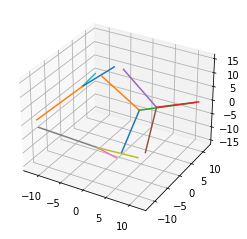

In [12]:
from mpl_toolkits.mplot3d import axes3d  
import matplotlib.pyplot as plt  
 
# visualize the model
def sig_vis(list, ax):
    for i in range(1, 4):
        figure = ax.plot([list[0][0], list[i][0]], [list[0][1], list[i][1]], [list[0][2], list[i][2]])

def vis(list):
    fig = plt.figure(1)  
    ax = fig.gca(projection='3d')
    for element in list:
        sig_vis(element, ax) 
    plt.show()

if __name__ == '__main__':
    list = leg_reduce_coord_gen(radius = 30, sigma = 2)
    vis(list)

In [13]:
import numpy as np

# calculating the 5 angles according to the coords of legs and COM
# see SI of the NERDSS paper II part for detail
def angle_cal(COM1, leg1, COM2, leg2):
    n = 8
    c1 = np.array(COM1)
    p1 = np.array(leg1)
    c2 = np.array(COM2)
    p2 = np.array(leg2)
    v1 = p1 - c1
    v2 = p2 - c2
    sig1 = p1 - p2
    sig2 = -sig1
    theta1 = round(math.acos(np.dot(v1, sig1)/(np.linalg.norm(v1)*np.linalg.norm(sig1))), n)
    theta2 = round(math.acos(np.dot(v2, sig2)/(np.linalg.norm(v2)*np.linalg.norm(sig2))), n)
    print('-----------------------')
    print('theta1 = ', round(theta1/math.pi, n), 'pi')
    print('theta2 = ', round(theta2/math.pi, n), 'pi')

    t1 = np.cross(v1, sig1)
    t2 = np.cross(v1, c1) # n1 = c1 here
    t1_hat = t1/np.linalg.norm(t1)
    t2_hat = t2/np.linalg.norm(t2)
    phi1 = round(math.acos(np.around(np.dot(t1_hat, t2_hat), n)), n)
    t3 = np.cross(v2, sig2)
    t4 = np.cross(v2, c2) # n2 = c2 here
    t3_hat = t3/np.linalg.norm(t3)
    t4_hat = t4/np.linalg.norm(t4)
    phi2 = round(math.acos(np.around(np.dot(t3_hat, t4_hat), n)), n)
    print('phi1 = ', round(phi1/math.pi, n), 'pi')
    print('phi2 = ', round(phi2/math.pi, n), 'pi')

    t1_ = np.cross(sig1, v1)
    t2_ = np.cross(sig1, v2)
    t1__hat = t1/np.linalg.norm(t1)
    t2__hat = t2/np.linalg.norm(t2)
    omega = round(math.acos(np.around(np.dot(t1__hat, t2__hat), n)), n)
    print('omega = ', round(omega/math.pi, n), 'pi')
    
    print('COM1 = ', COM1)
    print('COM2 = ', COM2)
    print('leg1 = ', leg1)
    print('leg2 = ', leg2)
    print('c1 = ', c1)
    print('c2 = ', c2)
    
    return [theta1, theta2, phi1, phi2, omega]

if __name__ == '__main__':
    coord = leg_reduce_coord_gen(radius = 30, sigma = 2)
    print(angle_cal(coord[0][0], coord[0][1], coord[2][0], coord[2][1]))
#     print(angle_cal(coord[1][0], coord[1][2], coord[3][0], coord[3][2]))
#     print(angle_cal(coord[1][0], coord[1][3], coord[2][0], coord[2][3]))

radius =  30
Number of elements in list:  4 (should be 4)

-----------------------
theta1 =  0.69591328 pi
theta2 =  0.69591328 pi
phi1 =  0.0 pi
phi2 =  0.0 pi
omega =  0.0 pi
COM1 =  [0.0, 8.164965809277, -5.773502691896]
COM2 =  [0.0, -8.164965809277, -5.773502691896]
leg1 =  [0.0, 1.0, -15.906294513316]
leg2 =  [0.0, -1.0, -15.906294513316]
c1 =  [ 0.          8.16496581 -5.77350269]
c2 =  [ 0.         -8.16496581 -5.77350269]
[2.18627604, 2.18627604, 0.0, 0.0, 0.0]


In [14]:
def input_coord(radius, sigma):

    coor = leg_reduce_coord_gen(radius, sigma)
    coor_ = np.array(coor[0])
    COM = coor_[0] - coor_[0]
    lg1 = coor_[1] - coor_[0]
    lg2 = coor_[2] - coor_[0]
    lg3 = coor_[3] - coor_[0]
    n = -coor_[0]
    
    print('COM = ', COM)
    print('lg1 = ', lg1)
    print('lg2 = ', lg2)
    print('lg3 = ', lg3)
    print('n   = ', n)
    
    return [COM, lg1, lg2, lg3, n]

if __name__ == '__main__':
    input_coord(radius = 30, sigma = 2)

radius =  30
Number of elements in list:  4 (should be 4)

COM =  [0. 0. 0.]
lg1 =  [  0.          -7.16496581 -10.13279182]
lg2 =  [-10.74744871   3.5824829    5.06639591]
lg3 =  [10.74744871  3.5824829   5.06639591]
n   =  [-0.         -8.16496581  5.77350269]


In [15]:
def tetr_face_main(radius, sigma):
    COM, lg1, lg2, lg3, n = input_coord(radius, sigma)
    theta1, theta2, phi1, phi2, omega = angle_cal(coord[0][0], coord[0][1], coord[2][0], coord[2][1])
    
    f = open('parm.inp', 'w')
    f.write(' # Input file (tetrahedron face-centered)\n\n')
    f.write('start parameters\n')
    f.write('    nItr = 10000000 #iterations\n')
    f.write('    timeStep = 0.1\n')
    f.write('    timeWrite = 10000\n')
    f.write('    pdbWrite = 10000\n')
    f.write('    trajWrite = 10000\n')
    f.write('    restartWrite = 50000\n')
    f.write('    checkPoint = 1000000\n')
    f.write('    overlapSepLimit = 7.0\n')
    f.write('end parameters\n\n')
    f.write('start boundaries\n')
    f.write('    WaterBox = [500,500,500]\n')
    f.write('end boundaries\n\n')
    f.write('start molecules\n')
    f.write('    tetr : 200\n')
    f.write('end molecules\n\n')
    f.write('start reactions\n')
    f.write('    tetr(lg1) + tetr(lg1) <-> tetr(lg1!1).tetr(lg1!1)\n')
    f.write('    onRate3Dka = 2\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [' + str(theta1) + ', ' + str(theta2) + ', ' + str(phi1) + ', ' + str(phi2) + ', ' + str(omega) + ']\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    tetr(lg2) + tetr(lg2) <-> tetr(lg2!1).tetr(lg2!1)\n')
    f.write('    onRate3Dka = 2\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [' + str(theta1) + ', ' + str(theta2) + ', ' + str(phi1) + ', ' + str(phi2) + ', ' + str(omega) + ']\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    tetr(lg3) + tetr(lg3) <-> tetr(lg3!1).tetr(lg3!1)\n')
    f.write('    onRate3Dka = 2\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [' + str(theta1) + ', ' + str(theta2) + ', ' + str(phi1) + ', ' + str(phi2) + ', ' + str(omega) + ']\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    tetr(lg1) + tetr(lg2) <-> tetr(lg1!1).tetr(lg2!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [' + str(theta1) + ', ' + str(theta2) + ', ' + str(phi1) + ', ' + str(phi2) + ', ' + str(omega) + ']\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    tetr(lg1) + tetr(lg3) <-> tetr(lg1!1).tetr(lg3!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [' + str(theta1) + ', ' + str(theta2) + ', ' + str(phi1) + ', ' + str(phi2) + ', ' + str(omega) + ']\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    tetr(lg2) + tetr(lg3) <-> tetr(lg2!1).tetr(lg3!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [' + str(theta1) + ', ' + str(theta2) + ', ' + str(phi1) + ', ' + str(phi2) + ', ' + str(omega) + ']\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('end reactions\n')
    
    f = open('tetr.mol', 'w')
    f.write('##\n')
    f.write('# Tetrahedron (face-centered) information file.\n')
    f.write('##\n\n')
    f.write('Name = tetr\n')
    f.write('checkOverlap = true\n\n')
    f.write('# translational diffusion constants\n')
    f.write('D = [13.0, 13.0, 13.0]\n\n')
    f.write('# rotational diffusion constants\n')
    f.write('Dr = [0.03, 0.03, 0.03]\n\n')
    f.write('# Coordinates\n')
    f.write('COM   ' + str(round(COM[0],8)) + '   ' + str(round(COM[1],8)) + '   ' + str(round(COM[2],8)) + '\n')
    f.write('lg1   ' + str(round(lg1[0],8)) + '   ' + str(round(lg1[1],8)) + '   ' + str(round(lg1[2],8)) + '\n')
    f.write('lg2   ' + str(round(lg2[0],8)) + '   ' + str(round(lg2[1],8)) + '   ' + str(round(lg2[2],8)) + '\n')
    f.write('lg3   ' + str(round(lg3[0],8)) + '   ' + str(round(lg3[1],8)) + '   ' + str(round(lg3[2],8)) + '\n')
    f.write('\n')
    f.write('# bonds\n')
    f.write('bonds = 3\n')
    f.write('com lg1\n')
    f.write('com lg2\n')
    f.write('com lg3\n')
    f.write('\n')

if __name__ == '__main__':
    tetr_face_main(radius = 40, sigma = 1)   

radius =  40
Number of elements in list:  4 (should be 4)

COM =  [0. 0. 0.]
lg1 =  [  0.         -10.38662108 -14.6889004 ]
lg2 =  [-15.57993162   5.19331054   7.3444502 ]
lg3 =  [15.57993162  5.19331054  7.3444502 ]
n   =  [ -0.         -10.88662108   7.69800359]
-----------------------
theta1 =  0.69591328 pi
theta2 =  0.69591328 pi
phi1 =  0.0 pi
phi2 =  0.0 pi
omega =  0.0 pi
COM1 =  [0.0, 8.164965809277, -5.773502691896]
COM2 =  [0.0, -8.164965809277, -5.773502691896]
leg1 =  [0.0, 1.0, -15.906294513316]
leg2 =  [0.0, -1.0, -15.906294513316]
c1 =  [ 0.          8.16496581 -5.77350269]
c2 =  [ 0.         -8.16496581 -5.77350269]
